# Chapter 2 - Introduction to Data Science
## Data Science

This notebook contains the code you need to follow along with Chapter 2.

You will need to download and extract the Titanic dataset, which can be found here: https://www.kaggle.com/c/titanic

*Note: This is meant to be a very brief introduction into the basic capabilities of pandas, sklearn, and matplotlib. These modules, and data science concepts in general, go far beyond what we will cover in this notebook. If you wish to learn more, which we encourage you to do so, feel free to refer to other guides, practice on other datasets, and refer to pandas, sklearn, and matplotlib documentation. They are very large, comprehensive libraries that let you do just about whatever you could want to do with data, so it is difficult to capture every major aspect of them. We will only give a basic introduction to these functions so you can understand what's going on later in the book when we build upon them*

To get started, we will need to import pandas, numpy, sklearn, and matplotlib.

**Pandas** will allow us to load and manipulate data to our liking.

**Numpy** is helpful for manipulating arrays and has great synergy with Pandas, so it is often imported alongside Pandas. It should automatically be installed alongside Pandas.

**Scikit-Learn** is a machine learning library that has helpful utility functions to process data into an optimal form for modeling.

**Matplotlib** is a data visualization library that helps us graph data to our liking. It also has good synergy with Numpy and Pandas

While it is not necessary that your versions of these packages match ours exactly, it's important to keep in mind that:
- older versions may not contain functions or features available in our version
- newer versions may have deprecated functions or features available in our version.

You will likely be fine to run this code on newer versions, but if you encounter problems, matching our versions will help ensure there's no missing or deprecated functionality.

In [1]:
import pandas 
import numpy
import sklearn
import matplotlib

print(f"Pandas version: ", pandas.__version__)
print(f"Numpy version: ", numpy.__version__)
print(f"Scikit-learn version: ", sklearn.__version__)
print(f"Matplotlib version: ", matplotlib.__version__)

Pandas version:  2.0.0
Numpy version:  1.22.2
Scikit-learn version:  1.2.2
Matplotlib version:  3.7.1


For convenience, the imports can be done the following way. As for matplotlib, we want to import matplotlib.pyplot to be able to plot data. 

Sklearn is typically not shorthanded, because instead of importing the entire module, we import specific parts of it.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data I/O

To get started with data science, we first need actual data. In this section, we will show you how to load and save data using Pandas.

In [3]:
# Path to the training data
data_path = 'data/train.csv'

CSV is a common data storage format. It stands for "comma separated value", and if you open up train.csv, you can see why this is the case.

There are many other formats as well as other read functions supported by Pandas, so be sure to check out their API documentation here: https://pandas.pydata.org/docs/reference/index.html

For example, pandas can read Excel files (.xlsx), JSON (.json), and even SAS (.sas7bdat) formats.

In [4]:
# pd.read_csv() returns a Pandas DataFrame object
df = pd.read_csv(data_path)

To visualize the dataframe, we can call df.head(n). The parameter we pass in is the number of rows displayed from the top, so if n=5 (the default number if you pass nothing in), it will return the first five rows of the dataframe.

Similarly, there is df.tail(), except that shows the last N rows.

If you are not using jupyter and would like to display this information, you can do print(df.head()) to print the same information in a text format. It won't look as good though, keep that in mind.

In [5]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


That is .head(). The method .tail(N) does the same except it displays the last N rows of the dataframe.

Let's find the shape by calling df.shape
The result of this should be a tuple of (M, N), where you have M rows and N columns.

In [6]:
# 891 rows, 12 columns
df.shape

(891, 12)

To save data, we can call df.to_csv(save_path) to save it as a CSV. There are other save formats supported as well.

Here, let's save the subset given to us by df.head(2). We are passing index=False as a parameter so that the current index is not added to the saved CSV as a column. If you want to save the index, then don't pass in index=False, since it's set to True by default

In [7]:
df2 = df.head(2)
df2.to_csv('two_rows.csv', index=False)

### DataFrame Creation

You can also create a Pandas DataFrame from scratch using lists and dictionaries. This is convenient for when you want to log various metrics during training and would like to make a dataframe and save or examine the collected data

In [8]:
metric_rows = [ [0.9, 0.2, 0.3], [0.8, 0.3, 0.2] ]
metrics = pd.DataFrame(metric_rows, columns=['Model1', 'Model2', 'Model3'])
metrics

,Model1,Model2,Model3
0,0.9,0.2,0.3
1,0.8,0.3,0.2


In [9]:
metric_dict = {'Model1': [0.9, 0.8], 'Model2': [0.2, 0.3], 'Model3':[0.3, 0.2]}
metrics = pd.DataFrame(metric_dict)
metrics

,Model1,Model2,Model3
0,0.9,0.2,0.3
1,0.8,0.3,0.2


### Data Manipulation

Once you have loaded your data, you are going to want to manipulate it in some capacity. We will go over the following functionality:
- Select
    - Selecting and slicing the dataframe by specific rows/columns
- Filter
    - Filtering rows based on specific conditions
- Sort
    - Sorting in ascending/descending order on one or more columns.
- Apply Functions
    - Applying a custom function over dataframe columns or rows, and running aggregate functions
- Grouping
    - Grouping dataframes, iterating through groups, and grouped aggregations
- Combining DataFrames
    - How to merge or concatenate dataframes
- Column Create, Rename, Drop

#### Select

Before we start selecting, let's find out what columns are in the dataframe.

##### List of Columns
We can get a list of all the columns like so:

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

If you want it as a list object, you can typecast it like so: list(df.columns)

Pandas is **case-sensitive**, meaning the actual case of the column matters. It is possible for a column 'Name' and 'nAME' to both exist and refer to different columns.

Let's only select the column 'Name'. You will get a Pandas Series in return. Note that we can apply.head() to a Pandas Series as well

In [11]:
df['Name'].head(2)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
Name: Name, dtype: object

Note that this does not look like the other tables we've seen.

This is because when you select individual columns, the returned result is a pandas Series, not DataFrame. A series and dataframe do contain a lot of shared functionality, but fundamentally differ in some cases. A series is better treated as a more explicitly indexed list of values, while a dataframe is a list of lists.

If we select the same column but as a list of string, so that we have ['Name'], we will get a DataFrame as a result.

In [12]:
df[['Name']].head(2)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."


A Pandas Series and a Pandas DataFrame have some differences in terms of the functions and attributes you can call on them, but you can think of a Pandas Series as a more sophisticated list/array, and a DataFrame like a 2D array where each "column" is its own Pandas Series.

Most of the time, if you are selecting a column, you'd want it in a Series format, so you'd just pass in the column name as a string.

To select multiple columns, we pass in a list of column names that we want

In [13]:
df[['PassengerId', 'Name', 'Survived']].head(2)

,PassengerId,Name,Survived
0,1,"Braund, Mr. Owen Harris",0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1


##### Selecting Rows

We can also select rows. There are two ways to go about doing this:
- iloc
- loc

**iloc** is integer-based indexing, meaning you are selecting rows and columns relative to their position in the dataframe. This works just like how you'd slice rows in an array, and you don't need to know the specific label associated with either the row or the column.

**loc** is label-based indexing, meaning the rows you select are determined by what they have been indexed as. You can think of this sort of like a dictionary, where each element in the entire dataframe has a specific key-index associated with it.

This is called "slicing", where we want a particular "slice" of the DataFrame as dictated by the indexing. Slicing can also include columns, as you will see shortly

Let's use iloc to get the first five rows

In [14]:
df.iloc[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This is just like selecting elements in a Python list, except it works to select rows. Negative indexing works as well, and you can select the last five rows like so:


In [15]:
df.iloc[-5:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


As you can see, this is just like using .head(n) and .tail(n) as shown earlier.

We can do the same thing with columns

In [16]:
# First five rows, first 4 columns
df.iloc[:5, :4]

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"


Now to use loc. Notice how this time, it included the fifth row. This is because loc is inclusive of the ending index, unlike iloc.

In [17]:
df.loc[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


To demonstrate the same thing except on the rows, we will replace the index with something that doesn't resemble zero-based indexing:

In [18]:
view = df.iloc[:5].copy()
view.index = ['a', 'b', 'c', 'd', 'e']
view

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
a,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
b,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
c,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
d,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
e,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Indexing columns also requires direct labels, but it's able to slice the columns as well just like in "iloc", except here we tell it to "pick all columns from 'Name' to 'Ticket'" how they are stored in the DataFrame.

In [19]:
view.loc['b':'d', 'Name':'Ticket']

,Name,Sex,Age,SibSp,Parch,Ticket
b,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599
c,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282
d,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803


If you end up with an index that you want to reset into a zero-based index, you can call .reset_index()

In [20]:
# Do not include the index as its own column by adding "drop=True" to .reset_index(). If you don't, it creates a column "index" and the values are what the old index was
view2 = view.loc['b':'d', 'Name':'Ticket']
view2 = view2.reset_index(drop=True)
view2

,Name,Sex,Age,SibSp,Parch,Ticket
0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599
1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282
2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803


### Filter

If you want to apply a filter on your DataFrame or Series, follow this notation:
df[df[column_string] == value]

Here, you can add any type of comparison you want. Greater than, less than, greater than or equal to, whatever returns a boolean value. This is the comparison that is applied on every element in the column, and it will only return results where true.

Let's filter by Age to find everyone over 50

In [21]:
df[df['Age'] > 50].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


We can have multiple filter conditions as well and incorporate 'or' as well as 'and'.

To have multiple conditions, you want it formatted like so:
df[(condition 1) logical_operator (condition 2) logical_operator ... ] with as many conditions as you want.

These are the logical operators supported and what symbol you should use:
- and: &
- or: |
- not: ~

Let's say we want all women over the age of 50

In [22]:
df[(df['Age'] > 50) & (df['Sex'] == 'female')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S


Suppose now that we want to find women that were married. To do so, we can just search if their name contains "Mrs." or not. 

By calling .str like so: df[column].str 

You can access a variety of functions to help you filter the dataframe, such as:
- df[column].str.contains(pattern)
- df[column].str.startswith(pattern)
- df[column].str.endswith(pattern)

And more you can find here: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.capitalize.html
Starting here, scroll down in the left bar to view all other pandas.Series.str methods. You can even apply regex patterns

In [23]:
df[df['Name'].str.contains("Mrs.")].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


Negating this by adding a ~ in front of boolean expression will simply find anyone that is not specifically a "married woman":

df[~(df['Name'].str.contains("Mrs."))]

Next, we can also check if the element is in some sort of iterable. For example, we will check for all rows where "Embarked" are not 'S' or 'C'. To do this, we can do:
df['Embarked'].isin(['S', 'C']) and just negate this

In [24]:
df[~df['Embarked'].isin(['S', 'C'])].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q


Let's now use filtering to demonstrate how we can replace values that match a specific query. First, we will make a copy of the dataframe so that we do not overwrite the original dataframe

In [25]:
df2 = df.copy()
df2.loc[df2['Sex'] == 'male', 'Sex'] = 0
df2.loc[df2['Sex'] == 'female', 'Sex'] = 1
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


The best way to replace values is by using .loc. Recall that the format of .loc is: df.loc[row_index, column_index]. We can use our boolean search to index what rows we want. Here, we will replace all instances of "male" with 0, and we will replace all instances of "female" with 1.

We cannot directly feed text into machine learning models, so we must transform them into numerical equivalents using a procedure. Here, we simply map "male" to 0, and "female" to 1.

#### Sorting


We can also sort dataframes. Sorting can be done on one column or a list of columns with custom ascending/descending ordering. By default, Pandas will assume ascending order.

In [26]:
df.sort_values('Fare', ascending=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


When you sort by multiple columns, the ordering of the values is preserved according to the order of the columns you pass in.

As an example, we will sort by 'Survived', 'Pclass', and 'Age'.

The sorting will be done in this order:

1. All values are sorted by 'Survived'
2. After sorting by 'Survived', all rows that share the same value for 'Survived' have their ties broken via sorting by 'Pclass'
3. Preserving the sorted order by 'Survived' and 'Pclass', any more ties (rows with the same 'Survived' and 'Pclass' values) are broken by sorting based on the column 'Age'

The column 'Survived' is only comprised of 0 or 1 values. Because of this, there are many 'ties' to break. Since so many rows share a 0 or 1 value, we can specify how these are to be ordered. We will now sort by 'Pclass' in addition to 'Survived'

However, we can there are still many ties (many rows sharing the same values for Survived and Pclass), so when also sorting by "Age", we can order all the rows with ties for "Survived" and "Pclass" by Age in ascending order as seen below.

In [27]:
df.sort_values(['Survived', 'Pclass', 'Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
...,...,...,...,...,...,...,...,...,...,...,...,...
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
727,728,1,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q


With multiple values, we can pass a list of booleans to specify the ascending/descending order. These correspond 1:1 with the list of columns you passed.

In the following example, we want 'Pclass' to be sorted in ascending order, while 'Age' is sorted in descending order

In [28]:
df.sort_values(['Pclass', 'Age'], ascending=[True, False])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


#### Applying Functions

We can apply functions on each row (or column) in the dataframe by using .apply(function). Here, we will convert Fare into an integer

In [29]:
df['Fare'].apply(int).head(2)

0     7
1    71
Name: Fare, dtype: int64

We can modify the values in a dataframe by applying a function on it like so:

In [30]:
# making a copy of df
df2 = df.copy()
df2['Fare'] = df2['Fare'].apply(int)
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C


We can apply any function here, including ones we define, lambda functions, even numpy functions

In [31]:
def custom_func(x):
    return 2*x + x

df2['Fare'] = df2['Fare'].apply(custom_func)
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,21,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,213,C85,C


We can also apply functions on the entire row by using the parameter "axis". With axis=1, we are passing in each row at a time, basically as if it were a 1 row slice of the entire dataframe each time. We can access the columns this way and perform an operation. In the following example, we are just multplying Fare with Survived.

We can also assign a new column in df2 like so:

In [32]:
df2['Fare_Survived'] = df2.apply(lambda x: x['Fare'] * x['Survived'], axis=1)
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,21,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,213,C85,C,213


So now, we can use this notation to create brand new columns if we'd like. We can also do the following, performing operations on the entire column in one shot in what is called a "vectorized" operation:

In [33]:
df2['Fare_Survived_Vectorized'] = df2['Fare'] * df2['Survived']
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Survived,Fare_Survived_Vectorized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,21,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,213,C85,C,213,213


Vectorized operations are more efficient and quicker implementations, more so than .apply(). If you have large dataframes, consider vectorizing operations where you can

Aggregate functions are those performed on a group of values that reduce it to one value. For example, mean, sum, max, min, range, std all must be applied on multiple values

In [34]:
df['Age'].mean(), df['Fare'].std(), df['Age'].max()

(29.69911764705882, 49.6934285971809, 80.0)

In [35]:
df[['Age', 'Fare', 'SibSp']].sum()

Age      21205.1700
Fare     28693.9493
SibSp      466.0000
dtype: float64

You can also apply it row-wise. Here, we are summing 'Age', 'Fare', 'SibSp' across each row.

In [36]:
df[['Age', 'Fare', 'SibSp']].sum(axis=1).head(5)

0     30.2500
1    110.2833
2     33.9250
3     89.1000
4     43.0500
dtype: float64

#### Grouping

Grouping let's you operate on subsets of the dataframe while holding certain values constant. Examples would be grouping by colors, size (small, medium, large), etc.

In [37]:
grouped = df.groupby('Pclass')
for name, group in grouped:
    print('\nPclass: ', name)
    print(group[['Pclass', 'Name']].head(2))


Pclass:  1
   Pclass                                               Name
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)

Pclass:  2
    Pclass                                 Name
9        2  Nasser, Mrs. Nicholas (Adele Achem)
15       2     Hewlett, Mrs. (Mary D Kingcome) 

Pclass:  3
   Pclass                     Name
0       3  Braund, Mr. Owen Harris
2       3   Heikkinen, Miss. Laina


df.groupby(column) returns a groupby object iterator. We can iterate through the groups one at a time and capture both the "name" (the value of this particular group, such as Pclass = 1, Pclass = 2, Pclass = 3) as well as the group itself, which contains only the rows with Pclass = 1, 2 or 3.

We can group by more columns as well

In [38]:
grouped = df.groupby(['Survived', 'Pclass'])
for name, group in grouped:
    print('\n[Survived, Pclass]: ', name)
    print(group[['Survived', 'Pclass', 'Name']].head(2))


[Survived, Pclass]:  (0, 1)
    Survived  Pclass                            Name
6          0       1         McCarthy, Mr. Timothy J
27         0       1  Fortune, Mr. Charles Alexander

[Survived, Pclass]:  (0, 2)
    Survived  Pclass                   Name
20         0       2   Fynney, Mr. Joseph J
33         0       2  Wheadon, Mr. Edward H

[Survived, Pclass]:  (0, 3)
   Survived  Pclass                      Name
0         0       3   Braund, Mr. Owen Harris
4         0       3  Allen, Mr. William Henry

[Survived, Pclass]:  (1, 1)
   Survived  Pclass                                               Name
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)

[Survived, Pclass]:  (1, 2)
    Survived  Pclass                                 Name
9          1       2  Nasser, Mrs. Nicholas (Adele Achem)
15         1       2     Hewlett, Mrs. (Mary D Kingcome) 

[Survived, Pclass]:  (1, 3)
   Survive

Now that we are grouping by two columns, each possible group is now a tuple of two possible values: either 0 or 1 (Survived), and 1, 2, 3 (Pclass).

The variable "name" will return us a tuple that contains the current group's values corresponding to the group columns we passed in. By this, we mean that the first value in "name" is falls under the first group column, "Survived". As we can see in the output, this first value in the tuple is only 0 or 1. The second value in the tuple corresponds with "Pclass".

We can also perform aggregations on the groups like so:

In [39]:
df[['Fare', 'Survived', 'Age']].groupby('Survived').sum()

,Fare,Age
Survived,,
0,12142.7199,12985.50
1,16551.2294,8219.67


The result is a dataframe with "Survived" as the index, and the columns that we passed in with the "sum" aggregate applied. 

We can apply the aggregates on multiple group columns like so:

In [40]:
df[['Fare', 'Pclass', 'Survived', 'Age']].groupby(['Survived', 'Pclass']).sum()

Fare      Age
Survived Pclass                     
0        1        5174.7206  2796.50
         2        1882.9958  3019.00
         3        5085.0035  7170.00
1        1       13002.6919  4314.92
         2        1918.8459  2149.83
         3        1629.6916  1754.92

#### Combining DataFrames



Merging is a way to combine two dataframes together in a particular manner. For example, you can merge two dataframes where rows in both dataframes have the same ID in common. It's useful for when you have two different dataframes. For example, consider a store, where all customer information (email, phone number, name, age, customer ID) is stored in one table, and in another table, we store every item sold (by item ID, customer ID of whoever bought it). If we want to find out more information about who is buying a certain cereal brand, we can:

1. Filter the item table to contain only the cereal brand we are interested in
2. Merge this item table with the customer table on customer ID, creating a new table where we have both the item history and the customer contact information

Now the store can email discounts on this particular cereal brand to customers that it knows frequently buy it as part of a loyalty program.

If you would like to explore the merge functionality in more detail, refer to the documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

Join is very similar to merge: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

Let's first split the main dataframe into two different dataframes:

1. A dataframe of passenger ID, class, fare
2. A dataframe of passenger ID, name, age, and survival status

We will now demonstrate a merge on passenger ID:

In [41]:
df1 = df[['PassengerId', 'Pclass', 'Fare']]

# We are reversing the order of this dataframe by using [::-1] to demonstrate left vs right joins
df2 = df[['PassengerId', 'Name', 'Age', 'Survived']][::-1]

df1.head(2), df2.head(2)

(   PassengerId  Pclass     Fare
 0            1       3   7.2500
 1            2       1  71.2833,
      PassengerId                   Name   Age  Survived
 890          891    Dooley, Mr. Patrick  32.0         0
 889          890  Behr, Mr. Karl Howell  26.0         1)

In [42]:
# Default inner join. Inner join: combine the columns of rows where the on='column' values are the same, order by df1 (left) dataframe
df1.merge(df2, on='PassengerId').head()

,PassengerId,Pclass,Fare,Name,Age,Survived
0,1,3,7.2500,"Braund, Mr. Owen Harris",22.0,0
1,2,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
2,3,3,7.9250,"Heikkinen, Miss. Laina",26.0,1
3,4,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
4,5,3,8.0500,"Allen, Mr. William Henry",35.0,0


In [43]:
# Right join, meaning merge the dataframe as usual but order by the right dataframe (df2)'s values
df1.merge(df2, on='PassengerId', how='right').head()

,PassengerId,Pclass,Fare,Name,Age,Survived
0,891,3,7.75,"Dooley, Mr. Patrick",32.0,0
1,890,1,30.00,"Behr, Mr. Karl Howell",26.0,1
2,889,3,23.45,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,0
3,888,1,30.00,"Graham, Miss. Margaret Edith",19.0,1
4,887,2,13.00,"Montvila, Rev. Juozas",27.0,0


In [44]:
# Left join orders by left dataframe's (df1) values after performing the join
df1.merge(df2, on='PassengerId', how='left').head()

,PassengerId,Pclass,Fare,Name,Age,Survived
0,1,3,7.2500,"Braund, Mr. Owen Harris",22.0,0
1,2,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
2,3,3,7.9250,"Heikkinen, Miss. Laina",26.0,1
3,4,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
4,5,3,8.0500,"Allen, Mr. William Henry",35.0,0


The complexities of merging tables go far beyond the basics that we just covered here. There are specific joins to account for nulls, methods of dealing with duplicate columns in both tables, and more.

It is also possible to concatenate two dataframes. That is, we can stack two dataframes together in different ways, either on top of each other or putting two columns together.
For simplicity, we will only demonstrate how to stack to dataframes together by rows.

First, we will separate the original dataframe into one exclusively containing male passenger records, and one exclusively containing female passenger records. 

In [45]:
df_male = df[df['Sex'] == 'male']
df_female = df[df['Sex'] == 'female']

df_male.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [46]:
df_female.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Notice that their indices, the leftmost value in each row, differ. This affects how the concatenation proceeds in certain cases. Next, we will simply concatenate the two dataframes where the columns are equal. This has the effect of stacking the dataframes together in the order they are presented to pd.concat().

In [47]:
pd.concat([df_male, df_female])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


#### Column Creation, Rename, Drop

Let's go over how to create a column. We briefly went over it earlier with the .appy() function, but there is a function to do this called df.insert()

In [48]:
df2 = df.copy()
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Let's insert a column that classifies whether someone is a child or adult. To do this, we will apply a custom function to the 'Age' column.

In [49]:
age_class = df2['Age'].apply(lambda x: 'child' if x < 18 else 'adult')
age_class.head(2)

0    adult
1    adult
Name: Age, dtype: object

Now we call df2.insert()

The arguments are: df2.insert(loc, column, value)

loc is where you want to insert it. If we did loc=0, it would insert it as the first column of the dataframe and shift every other column right. If we do loc=df.shape[-1], then it will insert it at the end.

In [50]:
# Add to the end
df2.insert(df2.shape[-1], 'Age_Classification', age_class)
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Classification
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult


#### Rename

Renaming can be done via df.rename(). A simple way of renaming is by passing a dictionary of keys and values, where the keys are the column names you want to rename, and the values are what to rename to.

More details can be found at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html


In [51]:
df2 = df2.rename(columns={'Age_Classification': 'Age_Status'})
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult


#### Drop

To drop a column, we can use df.drop()

The convention is df.drop(column, axis=1) or if you want to drop multiple at once, df.drop(list_of_columns, axis=1)

In [52]:
df2 = df2.drop('Age_Status', axis=1)
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Data Analysis



There are many things we can do with the dataframe to analyze the structure of the data as well as any relations between columns in the dataframe. Let's first start with value_counts(), which will find unique values within the column and give us the frequency count

#### Value Counts

value_counts() gives us the unique, possible values in the column along with their frequency counts. 

Let's pick a column that contains categorical string values, such as "Embarked". 

The convention is either df.value_counts() or df[column].value_counts(), so this is something we can use on a Pandas Series (such as what we get when we pick a particular column).

We can add dropna=False so that it will consider the frequency count of null values as well. By default, nulls are dropped

In [53]:
df['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

From this, we can see that there are a total of three unique categories in the column "Embarked" as well as a count of how many rows belong to each category. Each of these is a one letter representation of the town that the Titanic embarked from, where "S" is for Southhampton, "C" is for Cherbourg, and "Q" is for Queenstown.


In [54]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Here, .unique() is also showing us that nan (Null) is also a possible value without having to add dropna=False

#### Describe



You can call .describe() on a Pandas Series or a Pandas DataFrame. It will give you simple summary stats such as the 25th, 50th (median), and 75th quartiles, min/max, mean and standard devation

In [55]:
df[['Fare', 'Age']].describe()

,Fare,Age
count,891.000000,714.000000
mean,32.204208,29.699118
std,49.693429,14.526497
min,0.000000,0.420000
25%,7.910400,20.125000
50%,14.454200,28.000000
75%,31.000000,38.000000
max,512.329200,80.000000


#### Correlation

We can use df.corr() to get a correlation matrix. The correlation matrix tells us the linear correlation between the intersection of two columns, where -1 is a fully negatively correlated result (if one column increases, the other decreases linearly), and 1 is a fully positively correlated result (if one column increases, the other also linearly increases)

In [56]:
df2 = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df2.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Visualization

Here, we will demonstrate the functions to produce the simplest possible plots for: line plot, scatter plot, histogram, and bar chart. Matplotlib is a massive library on its own with a high degree of customizability, ranging from custom axis labels and titles, to custom plot colors and text labels, to being able to display images. We will touch upon these features in later parts of the book when visualizing data.

#### Line Plot

This type of plot is useful for visualizing time-series data

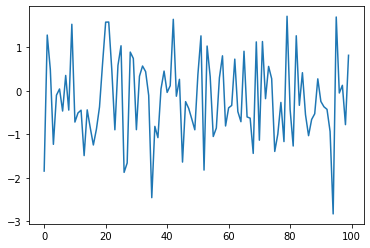

In [57]:
# Sample random noise and plot
noise = np.random.normal(size=100)
plt.plot(noise)

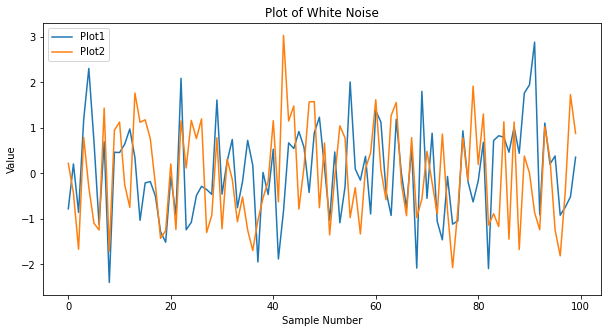

In [58]:

noise1 = np.random.normal(size=100)
noise2 = np.random.normal(size=100)

# plt.figure(figsize=(a, b)) lets you configure how large you want the plot to be
plt.figure(figsize=(10,5))

# plt.title(x) lets you add a title to the plot
plt.title("Plot of White Noise")

# plt.xlabel(x) adds a label to the x dimension on the plot
plt.xlabel("Sample Number")

# plt.ylabel(y) adds a label to the y dimension on the plot
plt.ylabel("Value")

# You can plot multiple series at once, they will all try and show up on the same plot
plt.plot(noise1)
plt.plot(noise2)

# A legend allows us to label the plots for convenience and readability. Pass a list of names corresponding with the order of the plotting code, so here Plot1 corresponds with the series noise1
plt.legend(['Plot1', 'Plot2'])


#### Scatter Plot

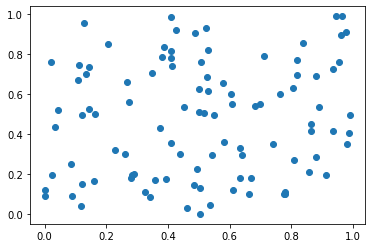

In [59]:
x = np.random.random(size=100)
y = np.random.random(size=100)

plt.scatter(x, y)

#### Histogram

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

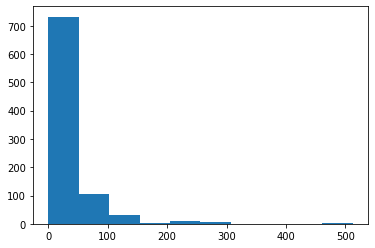

In [60]:
plt.hist(df['Fare'])

#### Bar Graph

<BarContainer object of 2 artists>

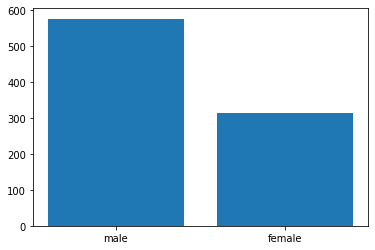

In [61]:
plt.bar(df['Sex'].unique(), df['Sex'].value_counts())

### Data Processing

Sometimes, you will need to process your data to address certain problems such as:
- Nulls. There are a variety of techniques to deal with null values, but this is required since machine learning models only operate on numerical data. Not a number needs to be mapped to some numeric result.
- Categorical Encoding. Similarly, categorical string values (labels like 'A', 'B', 'C') should be encoded into numeric equivalents like 1, 2, 3 so there is a mapping like A->1, B->2, C->3, etc. otherwise the model can't interpret it
- Normalization. When the magnitude of values in a column can vary widely, it is a good idea to normalize it to further stabilize the learning proces.


#### Nulls

We will look at the column 'Age', which has quite the number of nulls. Cabin has far more (at 687 nulls out of 891 total rows), but there's so many nulls that we are far more likely to introduce incorrect/useless information when trying to fill the null values. One technique you could use is to simply fill the nulls with 'Unknown' as a cabin assignment, but with this much missing data it might be better to simply drop the column.

For 'Age', there's several different options we can pursue, ranging from filling in by the average, to the median, to randomly picking values for age given the distribution. We will simply fill the values in by the average age.



In [62]:
df['Age'].isna().sum(), len(df['Age'])

(177, 891)

In [63]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [64]:
df.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
avg_age = df['Age'].mean()

In [66]:
df2 = df.copy()
df2['Age'] = df2['Age'].fillna(avg_age)

In [67]:
# Checking that the ages were filled in correctly by Sex
df2[(df['Age'].isna())].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q


#### Categorical Encoding

We can use scikit-learn's categorical encoder.


In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
df2 = df.copy()
df2['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [70]:
embarked_encoder = LabelEncoder()
embarked_encoder.fit(df2['Embarked'])

LabelEncoder()

In [71]:
embarked_encoder.classes_

array(['C', 'Q', 'S', nan], dtype=object)

In [72]:
df2['Embarked'] = embarked_encoder.transform(df2['Embarked'])
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2


In [73]:
df2['Embarked'] = embarked_encoder.inverse_transform(df2['Embarked'])
df2.head()                                         

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


A different way to incorporate categorical encoding is to create columns to represent the categorical column in a one-hot manner. In other words, for every unique category, you will create a column that is either 1, meaning the row is associated with that class, or 0, the row is not associated with this class.

For example, if you had a column for dog breed where the categories are 'pomeranian', 'german shepherd', or 'golden retriever', your categorical map could be 0: 'pomeranian', 1:'german shepherd', and 2:'golden retriever'. 

Instead of having a column of either 0, 1, 2 values, you could make new columns:
is_pomeranian, is_german_shepherd, is_golden_retriever, where if the row is a pomeranian, you'd have: (1, 0, 0) as the tuple for the row because this row is a pomeranian and not any other breed.

Let's do categorical encoding in a one-hot manner for 'Embarked'.

To do this, we can use pd.get_dummies()

In [74]:
# Prefix column lets use prepend a fixed name to the columns, otherwise the column name is just going to be whatever value corresponds with it. Go ahead and try it without the prefix argument to see the result
pd.get_dummies(df2['Embarked'], prefix='Embarked').head(2)

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False


If you want to include nan/null values, then add the argument: dummy_na = True. It will create a column to serve as a flag for any null values. Otherwise, if all three columns above are 0, then it's a NaN value.

Let's join it back with our original dataframe. Remember that the indices are the same, so if we join on the index, we have our original rows. You can then drop "Embarked" if you'd like to

In [75]:
df2.join(pd.get_dummies(df2['Embarked'], prefix='Embarked'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True,False,False


#### Normalization

There are several methods of normalization you can use, such as StandardScaler and MinMaxScaler. Once again, we can use scikit-learn to help with this. We will demonstrate StandardScaler, but the syntax is similar if you want to use MinMaxScaler or something else.

Normalizing data can help the learning process, mainly because of:
- Bias reduction. By reducing the magnitude of the data, it is easier for the model to not be mislead by outliers or other large-magnitude values and properly learn the task. If you have several variables, then normalizing can avoid cases where other variables are more neglected in favor of the variable with large values. This is because optimizing on this large-value variable produces the most results, even if it could be far more optimal.
- Stability. Similar to the above points, if all variables are within a similar scale, then the learning task is much more stabilized, ensuring that the model can arrive at a solution more easily. In some cases, this can even lead to a more optimal solution


In [76]:
from sklearn.preprocessing import StandardScaler 

In [77]:
df2 = df.copy()
age_scaler = StandardScaler()

# Note, when fitting StandardScaler, it expects an array of shape (M, 1). So either do df2['Age'].to_numpy().reshape(-1,1)
# age_scaler.fit(df2['Age'].to_numpy().reshape(-1,1))
age_scaler.fit(df2[['Age']])
# df2['Age'] = age_scaler.transform(df2['Age'].to_numpy().reshape(-1,1))
df2['Age'] = age_scaler.transform(df2[['Age']])
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,0,0,373450,8.0500,NaN,S


### Feature Engineering and Selection

Using the .corr to find out what features are important and what to trim
Removing columns that aren't needed or adding new ones as composites of old ones

#### Feature Engineering

Let's create the following new features to see if we can gain any useful information out of them:
- Title (extract Mr., Mrs., Miss., to add some additional information)
- Age groups (grouping by age, for ex: child, young adult, adult, old)
- Family Count (Parch is the number of parents and children on the ship. Sibsp is the number of siblings)


In [78]:
df2 = df.copy()
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
def get_title(x):
    # Every name is separated into last, first format
    last, first = x.split(',')
    
    # Remove any space after comma
    first = first.strip()
    
    # Always a dot after title
    title = first.split('.')[0].strip() + '.'

    return title

df2['Title'] = df2['Name'].apply(get_title)

In [80]:
def age_group(x):
    if x < 13:
        return 'child'
    elif x < 18:
        return 'teen'
    elif x < 25:
        return 'young_adult'
    elif x < 50:
        return 'adult'
    else:
        return 'old'

df2['Age_Group'] = df2['Age'].apply(age_group)

In [81]:
df2['Family_Count'] = df2['SibSp'] + df2['Parch']
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Group,Family_Count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,young_adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,adult,0


We have just created several features using some sort of transformation/procedure and applying it to various columns. This is one example of feature engineering, although you could also combine existing data with appropriate external data to create new features.

We don't know how good these features might be, but one way to check it is by using the correlation matrix. Before we do that, let's apply categorical encoding to our columns

In [82]:
sex_label_encoder = LabelEncoder()
df2['Sex'] = sex_label_encoder.fit_transform(df2['Sex'])

embarked_label_encoder = LabelEncoder()
df2['Embarked'] = embarked_label_encoder.fit_transform(df2['Embarked'])

title_label_encoder = LabelEncoder()
df2['Title'] = title_label_encoder.fit_transform(df2['Title'])

agegroup_label_encoder = LabelEncoder()
df2['Age_Group'] = agegroup_label_encoder.fit_transform(df2['Age_Group'])

df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Group,Family_Count
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,11,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,12,0,1


Now that we have categorically encoded all relevant columns into numerical equivalents, let's look at the correlation matrix

In [83]:
select_list = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Title', 'Age_Group', 'Family_Count']
df2[select_list].corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Age_Group,Family_Count
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,-0.163517,-0.193635,-0.052325,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,0.157112,0.029099,0.124159,0.065997
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,0.104057,0.250075,-0.029088,-0.200988
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,-0.025252,0.307794,-0.298501,-0.301914
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.066654,-0.200046,-0.013418,0.890712
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.038322,-0.126422,-0.054641,0.783111
Embarked,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,1.000000,0.071998,-0.039660,0.064701
Title,-0.193635,0.029099,0.250075,0.307794,-0.200046,-0.126422,0.071998,1.000000,-0.080130,-0.199883
Age_Group,-0.052325,0.124159,-0.029088,-0.298501,-0.013418,-0.054641,-0.039660,-0.080130,1.000000,-0.036469
Family_Count,0.016639,0.065997,-0.200988,-0.301914,0.890712,0.783111,0.064701,-0.199883,-0.036469,1.000000


Purely looking at the 'Survived' column, it appears that Sex and Pclass are the strongest possible predictors due to their stronger linear correlation with Survived. Remember that perfect linear correlation is either 1 or -1. Embarked and Title are weakly correlated, but there still seems to be somewhat of a correlation here.

We should also check the other variables to see if any of the feature columns are too highly correlated with another column. If this is true, we might want to drop some columns to avoid redundant data. For this, we want to focus more on eliminating strongly correlated columns, so anything with a magnitude of correlation more than 0.5.

You will notice that SibSp and Parch are very highly correlated with Family_Count. It's because we derived Family_Count from the former two columns. In this case, it does not look like Family_Count has a better correlation with Survived than either of SibSp and Parch. 

Otherwise, it does not look like we have any unnecessary variables. 

Let's try the correlation matrix again except with one-hot encodings

In [84]:
df2 = df2.join(pd.get_dummies(df2['Sex'], prefix='Sex'))
df2 = df2.join(pd.get_dummies(df2['Embarked'], prefix='Embarked'))
df2 = df2.join(pd.get_dummies(df2['Title'], prefix='Title'))
df2 = df2.join(pd.get_dummies(df2['Age_Group'], prefix='Age_Group'))
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_12,Title_13,Title_14,Title_15,Title_16,Age_Group_0,Age_Group_1,Age_Group_2,Age_Group_3,Age_Group_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,True,False,False,False,False,True,False,False,False,False


Since there are too many columns to select, let's just drop the columns we don't want. Even then, you will notice that there are a lot of columns that were created. We only need to look at the column 'Survived', so we can just select it from the correlation matrix because the correlation matrix is itself a Pandas DataFrame.

In [85]:
df2 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [86]:
df2.corr()[['Survived']]

,Survived
Survived,1.000000
Pclass,-0.338481
Sex,-0.543351
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
Embarked,-0.163517
Title,-0.193635
Age_Group,-0.052325


Overall, it looks like one-hot encoding the features has led to the discovery of some columns that are more correlated with "Survived" than the original encoded column. Transforming your categorical variables into one-hot encoded formats might lead to better performance on categorical data, especially if you have many categories. From the model's perspective, learning might be a bit easier when you're only concerned with whether a row is either X or not X vs having to consider if it's A, B, C, ... X, Y, Z. 

As you will see later, for some type of models, they learn to classify by learning how to separate the data points into unique zones that correspond to each class (whether or not a passenger survived, what species of animal the image is of, etc). This is called discriminative modeling, because they try and separate the data points into classes based on their features.

In [87]:
title_label_encoder.inverse_transform([8, 11, 12])

array(['Miss.', 'Mr.', 'Mrs.'], dtype=object)